# Programowanie Liniowe i algorytm simplex

Problem:

Przed świętem zmarłych producent planuje produkcje. Produkowane są dwa typy zniczy -- tradycyjny oraz nowoczesny.
Na pojedyńczej partii zniczy tradycyjnych producent zarabia 2000 zł a na nowoczesnych 2500 zł. Znicze wymagają wykorzystania maszyny (ekstrudera plastiku), gdzie jedna partia tradycyjnych zniczy wymaga 120 kg a nowoczesnych 200 kg plastiku. Jako, że producent posiada tylko jeden samochód dostawczy, dziennie jest w stanie dowieść 18000 kg materiału. Z racji małej dostępności specjalnych dodatków poprawiających biodegradowalność nowoczesnych zniczy można ich dziennie wykonać maksymalnie 80 partii.  

Dodatkowo, wydajność maszyny pozwala na produkcję maksymalnie partii 5 tradycyjnych lub 10 nowoczesnych zniczy na godzinę. Fabryka działa na 2 zmiany (16 godzin)

Jak powinien dobrać produkcję producent aby zmaksymalizować zysk?

# Kroki analizowania problemu

 1. Identyfikacja zmiennych decyzyjnych (decision variables)
 2. Określenie funkcji celu ( objective function)
 3. Określenie ograniczeń podanych wprost ( explicit constraints) oraz domniemanych (implicit constraints)
 4. Rozwiązanie problemu
 5. Analiza rozwiązania i ew. modyfikacja problemu

## Dla naszego problemu

### Zmienne decyzyjne

Ilość partii zniczy tradycyjnych x_1
Ilość partii zniczy nowoczesnych x_2

### Funkcja celu

Maksymalizacja (dziennego) zysku

max Z = 2*x_1 + 2.5*x_2

### Ograniczenia podane wprost

Ograniczenie ilości plastiku 1.2*x_1+2*x_2 <= 180
Wydajność maszyn 0.2*x_1+0.1*x_2<= 16
Ograniczona ilość dodatków x_2<=80
### Ograniczenia domniemane

x_1>=0 x_2>=0

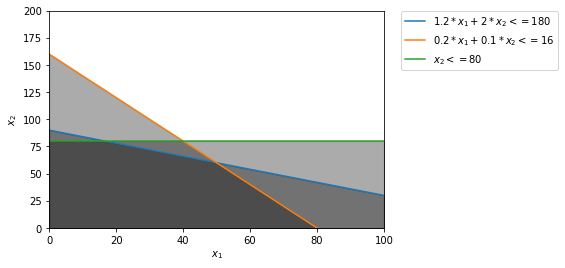

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.linspace(0, 100, 2000)

y1 = (180-1.2*x)/2
y2 = (16-0.2*x)*10
y3 = 0*x+80

# Make plot
plt.plot(x, y1, label=r'$1.2*x_1+2*x_2 <= 180$')
plt.plot(x, y2, label=r'$0.2*x_1+0.1*x_2<= 16$')
plt.plot(x, y3, label=r'$x_2<=80$')
plt.xlim((0, 100))
plt.ylim((0, 200))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# Fill feasible region
y5 = np.maximum(y1, 0)
y6 = np.maximum(y2, 0)
plt.fill_between(x,0, y5, color='black', alpha=0.33)
plt.fill_between(x,0, y6, color='black', alpha=0.33)
plt.fill_between(x,0, y3, color='black', alpha=0.33)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Algorytm simplex

Zapisujemy program w postaci dopełnieniowej (augmented form)

$z-2*x_1 - 2.5*x_2=0$

$1.2*x_1+2*x_2+x_3 = 180$

$0.2*x_1+0.1*x_2+x_4= 16$

$x_2 +x_5=80$

$x_1, x_2, x_3,x_4,x_5>=0$

$x_1=0, x_2=0, x_3=180, x_4=16, x_5=80$
jest dopuszczalnym (feasable) rozwiązniem zerowym (możemy zainicjalizować algorytm podstawiając pod x_1 i x_2 zero -initial basic feasable solution)

### Sprawdzian optymalności
Współczynniki stojące przy niebazowych zmiennych równania na Z ($ Z=2*x_1 +2.5 x_2$) są dodatnie a więc rozwiązanie nie jest optymalne.

Największy współczynnik (2.5) stoi przy zmiennej niebazowej x_2 a więc będziemy się poruszać w kierunku dodatnim wzdłuż osi x_2. x_2 staje się zmienną wchodzącą (entering basic variable)

### Minimum ratio test

Dla wszystkich ograniczeń poszukujemy najmniejszego x_2 dla którego któraś ze zmiennych bazowych staje się 0

$x_2= min (90,160,80) = 80$ dla którego x_5 staje się równa 0, staje się zmienną niebazową (zmienną wchodzącą). x_2 staje się zaś zmienną bazową.

### Przekształcenie równań

Dokonujemy przekształceń (eliminacja Gaussa) równań, aby w równaniu w którym występuje z, występowały tylko zmienne niebazowe, zaś współczynniki równań dla zmiennych bazowych w pozostałych równaniach mają być równe 1 

$z-2*x_1 +2.5*x_5=200$

$1.2*x_1+x_3-2*x5 = 20$

$0.2*x_1+x_4-0.1*x_5= 8$

$x_2 +x_5=80$

### Kolejna iteracja

Rozwiązanie nie jest optymalne bo współczynnik przy x_1 jest dodatni. x_1 staje się zmienną wchodzącą


#### Minimum ratio test
$x_1= min(16  \frac{2}{3}, 40)= 16 \frac{2}{3} $ x_3 staje się zmienną wychodzącą

#### Eliminacja Gaussa

$z+\frac{5}{3} x_3 -\frac{5}{6}*x_5=\frac{700}{3}$

$x_1+\frac{5}{6}x_3-\frac{5}{3}*x_5 = \frac{50}{3}$

$-\frac{1}{6}x_3+x_4+\frac{7}{30}*x_5= \frac{14}{3}$

$x_2 +x_5=80$

Nadal jest to rozwiązanie nieoptymalne, gdyż przy x_5 jest (dodatni) współczynnik $5/6$, a więc zwiększając x_5 można zwiększyć Z

x_5=min(20,80)=20 (dla rosnącego x_5 x_1 będzie zawsze dodatnie), x_4 staje się zmienną wychodzącą

stąd równiania przyjmą formę

$ z+ \frac{15}{14} x_3 + \frac{25}{7} x_4 = 250 $

$x_1 -5/14 x_3+50/7 x_4 = 50$

$-5/7 x_3 +30/7 x_4 + x+5 = 20$

$x_2+5/7 x_3-30/7 x_4= 60$

Dla równania $z= 250 - \frac{15}{14} x_3 - \frac{25}{7} x_4$ współczynniki przy obu zmiennych niebazowych są ujemne jest to więc rozwiązanie optymalne. Ma ono postać $x_1= 50, x_2 =60, x_3=0, x_4=0, x_5=20$

Współczynniki przy zmiennych niebazowych to tzw shadow prices, które pokazują jaką wartość mają ograniczenia. Zwiększając o 1 (czyli 100 kg) ilość plastiku zwiększymy zysk o $15/14$ (około 1071)  a zwiększając o 1 wydajność maszyn (np. pracując dodatkową godzinę) o $25/7$ (3571).

Mamy także wartość tzw. slack variables (tj. x_3, x_4, x_5), które mówią nam jakie mamy marginesy. W szczególności margines x_5=20 sugeruje, że nawet gdyby przez niedostępność dodatków maksymalnie można byłoby wyprodukować 60 partii nowoczesnych zniczy (a nie 80) nasz zysk nie zmieniłby się. 

# Rozwiązanie problemu za pomocą biblioteki pulp

In [70]:
import pulp

problem_znicze = pulp.LpProblem("Problem znicze", pulp.LpMaximize)

x_1 = pulp.LpVariable('x_1', lowBound=0, cat='Continuous')
x_2 = pulp.LpVariable('x_2', lowBound=0, cat='Continuous')

In [71]:
# Objective function
problem_znicze += 2 * x_1 + 2.5 * x_2, "Z"

# Constraints
problem_znicze += 1.2*x_1+2*x_2 <= 180, "ilosc plastiku"
problem_znicze += 0.2*x_1+0.1*x_2<= 16, "wydajnosc maszyn"
problem_znicze += x_2<=80, "ilosc dodatkow"


In [72]:
problem_znicze

Problem znicze:
MAXIMIZE
2*x_1 + 2.5*x_2 + 0.0
SUBJECT TO
ilosc_plastiku: 1.2 x_1 + 2 x_2 <= 180

wydajnosc_maszyn: 0.2 x_1 + 0.1 x_2 <= 16

ilosc_dodatkow: x_2 <= 80

VARIABLES
x_1 Continuous
x_2 Continuous

In [73]:
problem_znicze.solve()

1

In [74]:
for variable in problem_znicze.variables():
    print("{} = {}".format(variable.name, variable.varValue))

x_1 = 50.0
x_2 = 60.0


In [75]:
print(pulp.value(problem_znicze.objective))


250.0


Dla kame

In [98]:
print("""\nSensitivity Analysis\n
        Name\tConstraint\t\t\tShadow Price\t\tSlack""")
for name, c in problem_znicze.constraints.items():
    print(str(name).ljust(17), ":", str(c).ljust(33), str(c.pi).ljust(17), str(c.slack).ljust(10))


Sensitivity Analysis

        Name	Constraint			Shadow Price		Slack
ilosc_plastiku    : 1.2*x_1 + 2*x_2 <= 180.0          1.0714286         -0.0      
wydajnosc_maszyn  : 0.2*x_1 + 0.1*x_2 <= 16.0         3.5714286         -0.0      
ilosc_dodatkow    : x_2 <= 80                         -0.0              20.0      
